# WeatherPy

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=20)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=20)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

17

In [8]:
cities

['adrar',
 'yellowknife',
 'mys shmidta',
 'batticaloa',
 'dikson',
 'cape town',
 'hilo',
 'ancud',
 'richards bay',
 'rikitea',
 'mataura',
 'belushya guba',
 'ushuaia',
 'turbat',
 'maniitsoq',
 'tarakan',
 'barrow']

In [9]:
# Create new dataframe with cities
weather_df = pd.DataFrame(cities, columns = ['City'])

In [10]:
# Import google API key
from api_keys import g_key

# Set variables for weather API calls
weather_url = "http://api.openweathermap.org/data/2.5/weather"
params = {'appid':weather_api_key,
         'units':'imperial'}

# Print output of API calls
print('Beginning Data Retrieval')
print('------------------------')

# Store weather data into dataframe for each city
for index, row in weather_df.iterrows():
    params['q'] = row['City']
    response = requests.get(weather_url, params).json()
    try:
        print(f"Processing Record {index} | {row['City']}")
        weather_df.loc[index,'Lat'] = response['coord']['lat']
        weather_df.loc[index,'Lng'] = response['coord']['lon']
        weather_df.loc[index,'Max Temp'] = response['main']['temp_max']
        weather_df.loc[index,'Humidity'] = response['main']['humidity']
        weather_df.loc[index,'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index,'Wind Speed'] = response['wind']['speed']
        weather_df.loc[index,'Country'] = response['sys']['country']        
        weather_df.loc[index,'Date'] = response['dt']
    except:
        print('City not found.  Skipping...')
print('------------------------')
print('Data Retrieval Complete')
print('------------------------')
        

Beginning Data Retrieval
------------------------
Processing Record 0 | adrar
Processing Record 1 | yellowknife
Processing Record 2 | mys shmidta
City not found.  Skipping...
Processing Record 3 | batticaloa
Processing Record 4 | dikson
Processing Record 5 | cape town
Processing Record 6 | hilo
Processing Record 7 | ancud
Processing Record 8 | richards bay
Processing Record 9 | rikitea
Processing Record 10 | mataura
Processing Record 11 | belushya guba
City not found.  Skipping...
Processing Record 12 | ushuaia
Processing Record 13 | turbat
Processing Record 14 | maniitsoq
Processing Record 15 | tarakan
Processing Record 16 | barrow
------------------------
Data Retrieval Complete
------------------------


In [29]:
# Remove cities not found, reset index, and export into csv file
weather_df.dropna(inplace=True)
weather_df.reset_index(inplace=True)
weather_df.to_csv(output_data_file, header=True)

## Inspect the data and remove the cities where the humidity > 100%.

In [31]:
weather_df.describe()

,level_0,index,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,7.000000,8.200000,8.081540,-13.603367,65.214000,69.000000,59.266667,7.498667,1.627844e+09
std,4.472136,5.087801,45.234268,103.861743,20.094018,22.303107,42.841013,6.121246,9.514640e+01
min,0.000000,0.000000,-54.800000,-156.788700,39.360000,18.000000,0.000000,1.010000,1.627844e+09
25%,3.500000,4.500000,-31.354400,-94.086400,47.930000,60.500000,15.000000,3.860000,1.627844e+09
50%,7.000000,8.000000,7.710200,-10.071100,63.810000,74.000000,68.000000,5.750000,1.627844e+09
75%,10.500000,12.500000,44.229150,71.795200,81.140000,82.000000,100.000000,8.600000,1.627844e+09
max,14.000000,16.000000,73.506900,168.864300,102.090000,98.000000,100.000000,23.890000,1.627844e+09


## Latitude vs. Temperature Plot

In [32]:
clean_city_data = weather_df
latitude = clean_city_data['Lat']

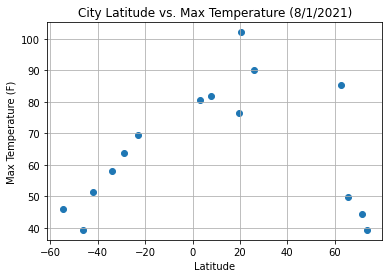

In [33]:
# Plot latitude vs temp
temp = clean_city_data['Max Temp']
plt.scatter(latitude,temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (8/1/2021)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

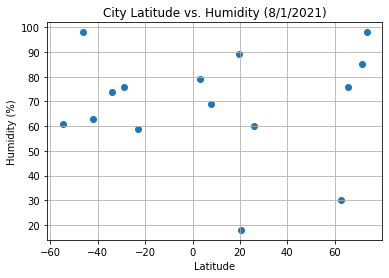

In [34]:
# Plot latitude vs. humidity
humidity = clean_city_data['Humidity']
plt.scatter(latitude,humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (8/1/2021)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

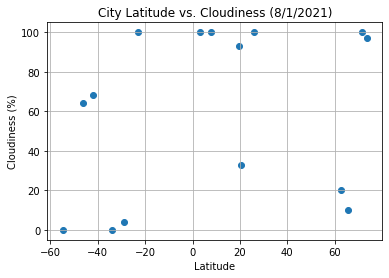

In [36]:
# Plot latitude vs cloudiness
cloudiness = clean_city_data['Cloudiness']
plt.scatter(latitude,cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (8/1/2021)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

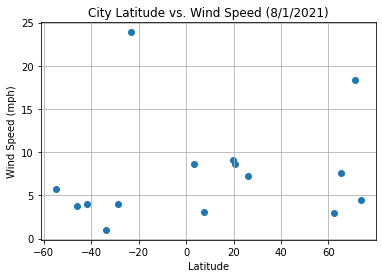

In [37]:
# Plot latitude vs wind speed
wind_speed = clean_city_data['Wind Speed']
plt.scatter(latitude,wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (8/1/2021)')
plt.grid()
plt.show()

## Linear Regression

In [38]:
# Separate dataframe by Lat
northern_data = clean_city_data.loc[clean_city_data['Lat']>=0]
southern_data = clean_city_data.loc[clean_city_data['Lat']<0]

In [41]:
# Set variables for northern and southern latitudes
northern_latitude = northern_data['Lat']
southern_latitude = southern_data['Lat']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.7425470214118096


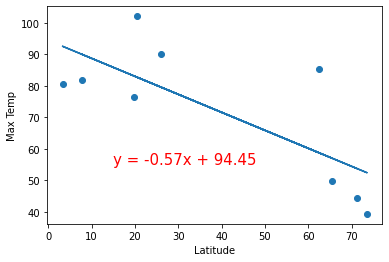

In [45]:
# Find max temp for northern latitudes
n_temp = northern_data['Max Temp']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
slope, int, rvalue = linregress(northern_latitude,n_temp)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(15,55),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.9120737367507253


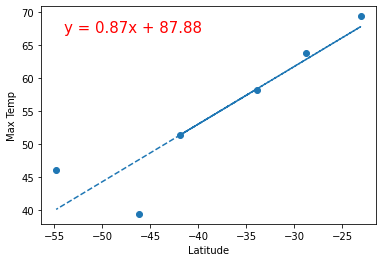

In [48]:
# Find max temp for southern latitudes
s_temp = southern_data['Max Temp']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
slope, int, rvalue = linregress(southern_latitude,s_temp)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,67),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1778462287034101


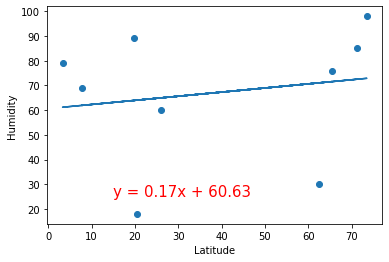

In [50]:
# Find humidity for northern latitudes
n_humidity = northern_data['Humidity']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
slope, int, rvalue = linregress(northern_latitude,n_humidity)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(15,25),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.1657460123394284


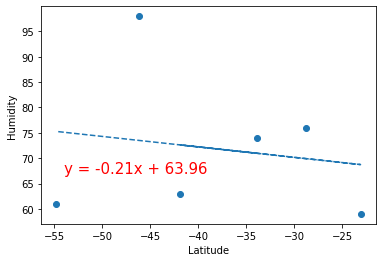

In [59]:
# Find humidity for southern latitudes
s_humidity = southern_data['Humidity']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
slope, int, rvalue = linregress(southern_latitude,s_humidity)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,67),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.3344065236528081


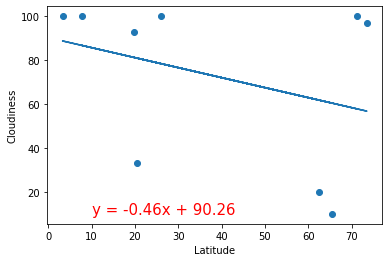

In [58]:
# Find cloudiness for northern latitudes
n_cloudiness = northern_data['Cloudiness']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
slope, int, rvalue = linregress(northern_latitude,n_cloudiness)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.29996877798780164


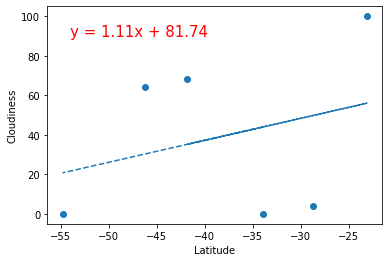

In [56]:
# Find cloudiness for southern latitudes
s_cloudiness = southern_data['Cloudiness']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
slope, int, rvalue = linregress(southern_latitude,s_cloudiness)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-54,90),fontsize=15,color="red")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.18555743912171702


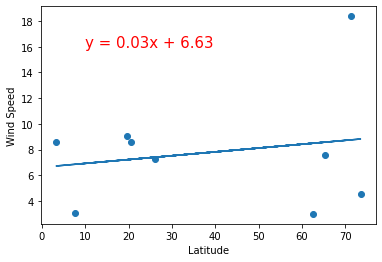

In [61]:
# Find wind speed for northern latitudes
n_wind = northern_data['Wind Speed']

# Plot scatter plot with linear regression line
plt.scatter(northern_latitude,n_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
slope, int, rvalue = linregress(northern_latitude,n_wind)[0:3]
line = slope * northern_latitude + int
plt.plot(northern_latitude,line)

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(10,16),fontsize=15,color="red")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.5264113955767803


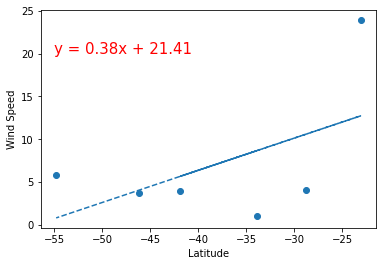

In [63]:
# Find wind speed for southern latitudes
s_wind = southern_data['Wind Speed']

# Plot scatter plot with linear regression line
plt.scatter(southern_latitude,s_wind)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
slope, int, rvalue = linregress(southern_latitude,s_wind)[0:3]
line = slope * southern_latitude + int
plt.plot(southern_latitude,line,"--")

# Print R value
print(f'The r-value is: {rvalue}')

# Add text
line_eq = f'y = {round(slope,2)}x + {round(int,2)}'
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.show()